# Basic Plotting with matplotlib

Now in previous versions of matplotlib we would use a backend specific for Jupyter called `nbagg`. But things have changed, and now we use an inline backend engine. Now, you don't really need to know the details of this, but it's helpful to know that you can investigate if you want to. Let's import matplotlib and check which backend we will be using.

In [1]:
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

Ok, we're going to start our plotting journey by making a graph using the `plot` function. A plot has two axes, an x-axis along the horizon, and a y-axis which runs vertically.

First, let's import the pyplot scripting layer as `plt`. All of the functions which will run against the Pyplot module are part of the scripting layer of the architecture. Let's take a look at the plot function by looking at the docstring.

In [2]:
import matplotlib.pyplot as plt
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

Ok, that's a lot of documentation! If you're not used to seeing it, this Python function declaration with two arguments, the star args, and the double star kwargs can be a bit obscure. What's being said here by the star args is that the function supports any number of unnamed arguments. The double star keyword args also means that it supports any number of named arguments. This makes the function declaration very flexible since you can pass in basically any number of arguments, named or not, but it makes it difficult to know what is an appropriate argument. Reading on, we see that the arguments will be interpreted as x, y pairs.

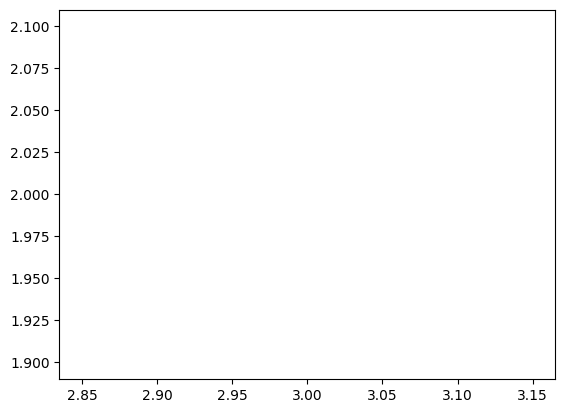

In [3]:
# So let's try with just one data point at position 3,2. The return value is 
# the plot itself, and JupyterLab will call display automatically on this to
# render it in the notebook.
plt.plot(3, 2)

We don't see the data points though, which is a bit odd. It turns out that the third argument to `plot` should be a string which signifies how we want that data point to be rendered. Let's use a period for a dot, and we'll see that our data point shows up.

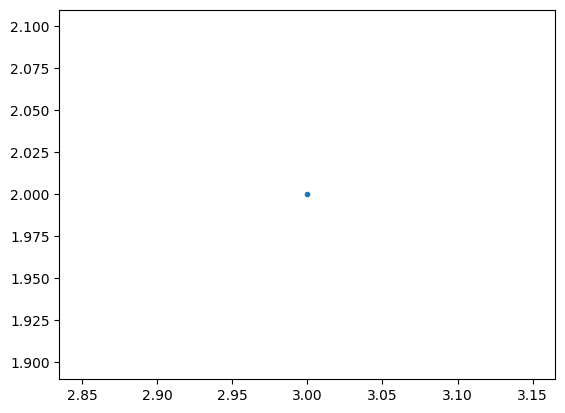

In [4]:
# The docs tell us what the different characters will render like, here we're just going
# to use a full stop for the marker
plt.plot(3, 2, '.')

You'll notice that the subsequent calls to plot have not updated our previous visualization. The backend we are using is not interactive, so subsequent calls create new plots as new cells in the notebook, and this is a handy way to iteratively explore your data.

Here's where some of the confusion with matplotlib as a library tends to come from. In the last lecture, I explained that there's an Artist layer, and that it is figures with subplots and axes and data points, which are rendered as patches onto these axes, but we haven't seen any of that here. Instead, we just called one function on a module named plot, so what's going on? The pyplot scripting interface is managing a lot of objects for you. It keeps track of the latest figure of subplots, and of the axis objects. Moreover, it actually hides some of these behind methods of its own. So the pyplot module itself has a function which is called plot, but it redirects calls to this function to the current axes object. This makes for a significant learning curve, and you'll see many discussions in web tutorials, and Stack Overflow, where people are confused by these two different approaches to making figures show up.

In data science workflows I think it's much more common to use the scripting layer, like we just did. But it's worth it to take a look at a the alternative object approach that's a bit more verbose. Actually, while some would call it the matplotlib object API, I think it's more accurate to think of it as directly interfacing with the Artist layer instead. 

In [5]:
# First, I'm going to import a new backend called FigureCanvasAgg.
from matplotlib.backends.backend_agg import FigureCanvasAgg
# Now we'll bring in the figure object
from matplotlib.figure import Figure

# I'll create a new empty figure
fig = Figure()

# And then associate this figure with the canvas backend
canvas = FigureCanvasAgg(fig)

# We can then add a subplot directly to this. We're going to talk more about subplots in a future 
# lecture, but this number 111 actually means that we just want one plot. The return value for the 
# subplot is the Axes object, which contains methods for plotting
ax = fig.add_subplot(111)

# Now we can plot on the Axes as per usual
ax.plot(3, 2, '.')

# We have a figure now, but out backend isn't able to render this directly inside of JupyterLab.
# So here I'll just save the figure to a png file instead.
canvas.print_png('test.png')

Then, we'll do a quick HTML cell magic, and execute that and see the rendered image. That's a lot more work than using the scripting layer, but you can see the effect is the same.

In [6]:
%%html
<img src='test.png' />

It's important to note though that the scripting layer isn't magic, it's just doing some of the behind the scenes work for us. For instance, when we make a call to pyplots `plot`, the scripting layer actually looks to see if there's a figure that currently exists, and if not, it creates a new one. It then returns the `Axes` for this figure.

We don't have to store that though, because we can always get access to the current `Figure` object using the `gcf` function, which stands for "get current figure". Similarly, we have another functions called `gca` -- "get current axes" -- which will return to us the current axes to render upon.

Let's create a new figure with pyplot, grab the axes, and set the x and y limits.

(0.0, 6.0, 0.0, 10.0)

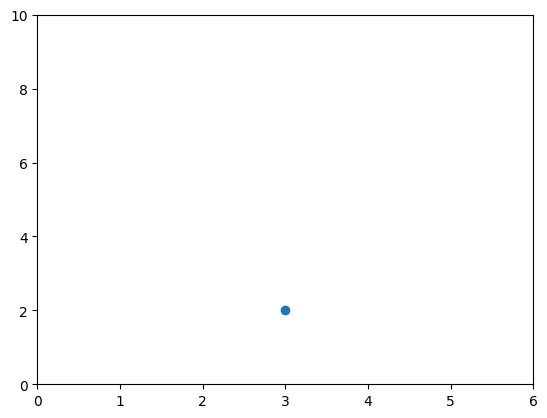

In [7]:
# Just create a figure as we previously did
plt.figure()

# Plot the point (3,2) -- this time I'll use the circle marker
plt.plot(3, 2, 'o')

# Get a reference to the current axes
ax = plt.gca()

# And set our axis properties. This function takes four parameters: a minimum value 
# for x which we'll put it zero, a maximum value for x which we'll put at six, and
# minimum and maximum y values.
ax.axis([0,6,0,10])

All right, one more demonstration on the fundamentals of putting together a plot. You can add Artists to an axes object at any time. Pyplot is doing this for us when we call the plot function. It's determining what shape we want from the string, the location associated with that shape, that it's creating a patch object, and adding that to the axes. If we make subsequent calls to the `plot` function before we render it the data will be added as different series, and colored differently.

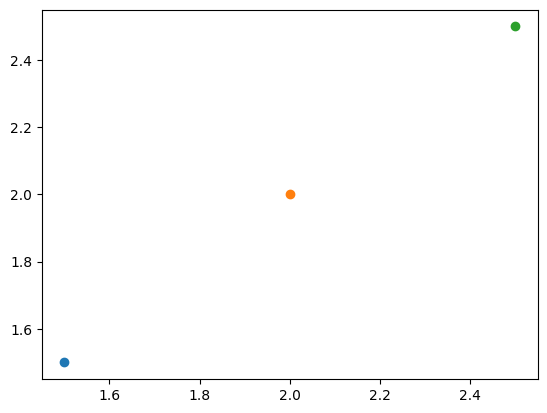

In [8]:
# I'll create a new figure
plt.figure()

# First I'll plot point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')

# Then a couple more
plt.plot(2, 2, 'o')
plt.plot(2.5, 2.5, 'o')

A lot of complexity is hidden from you, but we can go further with the `Axes` object, to the point where we can actually get all of the child objects that that axes contains. We do this with the axes `get_children` function. Let's take a look at what children exist in the current axes.

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

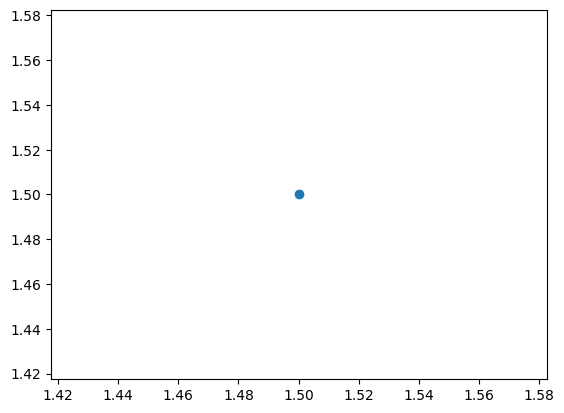

In [9]:
# Get current axes - this will create a new figure since we're in a new cell
ax = plt.gca()

# Let's add a point
plt.plot(1.5, 1.5, 'o')

# And take a look at all of the children of the Axes object
ax.get_children()

Here, we can see that there's actually a `Line2D` object contained in this axes, this is our data point! We also have a number of spines which are actual renderings of the borders of the frame including tic markers, two axis objects, and a bunch of text which are the labels for the chart. There's even a rectangle which is the background for the `Axes`.

Okay, so there's a whirlwind tour of how to be productive with matplotlib and make your first chart. Now, in truth, you're not going to spend a lot of time getting individual artists or interacting with splines, probably. But you can, if you want to. The system isn't magic, and now we've walked through how you can investigate a bit to better understand what's actually happening underneath.

In the next lecture, we're going to go through some of the different built-in charting options which are available to us.

# Scatter Plots

In the previous lecture, I introduced the `plot` function, which generates a series of points which get rendered against an `Axes` object.
Matplotlib actually has a number of useful plotting methods in the scripting layer which correspond to different kinds of plots we might want to use. We are not going to go through all of them here but we'll touch on a few of the major ones. Regardless, there are a few things to keep in mind which we learned in the previous lecture. 
1. First, pyplot is going to retrieve the current figure with the function `gcf` and then get the current axis with the function `gca`. Pyplot is keeping track of the axis objects for you. But don't forget that they're there and we can get them when we want to get them.
2. Second, pyplot just mirrors the API of the `Axes` objects. So you can call the `plot` function against the pyplot module, and this is just calling the axis plot functions underneath.
3. Finally, remember that the function declaration from most of the functions in matplotlib end with an open set of keyword arguments. There are a lot of different properties you can control through these keyword arguments, and you won't find them described for each function in the docs. That can be a bit frustrating because you end up having to learn from examples.

I'll start peppering in some of them this week to demonstrate that the matplotlib documentation is really key in gaining a full understanding of the options available.
With that in mind let's move on to talk first about scatter plots.

A scatter plot is a two-dimensional plot similar to the line plots I've shown. The scatter function takes an x-axis value as a first argument and y-axis value as the second. If the two arguments are the same, we get a nice diagonal alignment of points.

In [1]:
# Let's bring in the scripting interface
import matplotlib.pyplot as plt

# I'll bring in numpy as we're going to use it later and matplotlib is really based on numpy arrays. 
import numpy as np

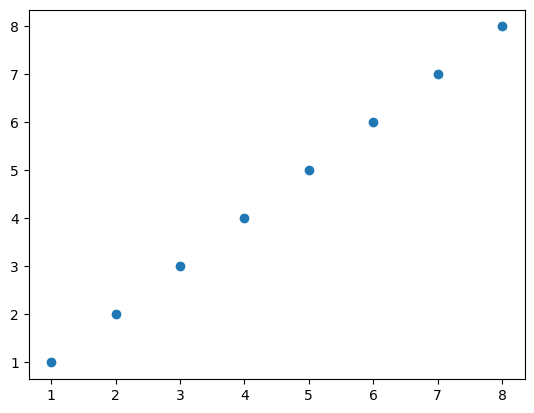

In [26]:
# Now let's create some fake data
x = np.array([1,2,3,4,5,6,7,8])
y = x

# Let's create a new figure
plt.figure()
# And now let's get matplotlib to produce a scatter plot. This is similar to plt.plot(x, y, '.'), but
# the underlying child objects in the axes are not Line2D
plt.scatter(x, y); 

Now, `scatter` doesn't represent items as a series as `plot` did, instead, we can pass it a list of colors which correspond to given points. Let's use some list arithmetic to create a new list just short of the number of data points we need and set all of the values to green. Then we'll add a final value of red.

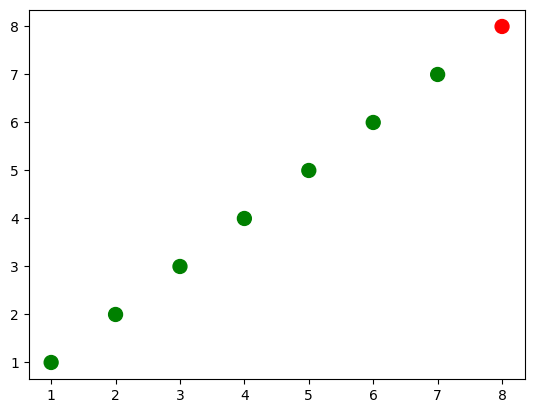

In [3]:
#Some new fake data
x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

# create our new figure
plt.figure()

# plot the point with size 100 and our chosen color list
plt.scatter(x, y, s=100, c=colors);

The separation of data points into lists, which describes them as components is a pretty common pattern in matplotlib. You have some set of items, but they're actually described as the same slice across many different data sources.

Those who are familiar with object programming might expect that each data point is represented with its own instance, which encapsulates all of its properties. For instance, a point has an x value and a y value and a color and a size. That's not the case here. This is where it's useful to have some knowledge of list comprehensions and lambdas as we talked about in the first course. Also important is the zip function and list unpacking. And because this is so common in the Python data science world, I'm going to take a brief aside and talk about that here.

Recall that the zip method takes a number of iterables and creates tuples out of them, matching elements based on index. So if we have two lists of numbers, zip will take the first from each and create a tuple, then the second from each and create a tuple, and so on.

Also remember that zip has lazy evaluation because it's actually a generator in Python 3 which means we need to use the `list` function if we want to see the results of iterating over zip.

Let's demonstrate. Here we'll create a new zip generator with a zip function passing in two lists of numbers. When we convert this generator to a list, we see there's a list of pairwise tuples.

In [10]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

# let's do that again, but this time let's use unpacking instead of list
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


Storing point data as tuples is common and you should be familiar with being able to convert data to and from this form. If we want to turn the data back into two lists, one with the x component and one with the y component, we can use parameter unpacking with zip.

When you pass a list or an iterable  to a function and prepend it with an asterisk, each item is taken out of the iterable and passed as a separate argument.
So that's a brief aside on a valuable tool which you will see when manipulating and cleaning data in the wild. Now, let's get back to plotting. Let's take these two lists and plot them to a new figure using scatter. Instead of plotting them as one data series, we'll slice the lists and plot them as two data series.

Instead of setting a color per datapoint, we can color each series with a single value if we want to. We can also do things like change the color or transparency of an entire series. We can also add a descriptive label as well.

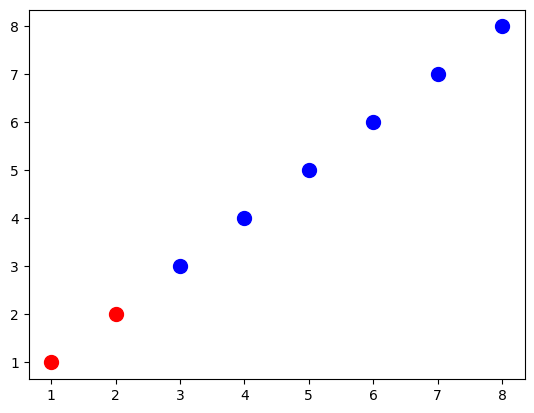

In [11]:
#Create a blank figure
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

You'll notice that the label didn't show, at the moment it's just held internally for each series, and I'll get to that in a minute, but let's talk a bit more about the properties of axis.

The axes generally have labels to them to explain what they represent or the units that they describe. Charts tend to have titles as well, so let's put this in place and, since pyplot mirros much of the API of the axes objects, we can make calls directly with pyplot.

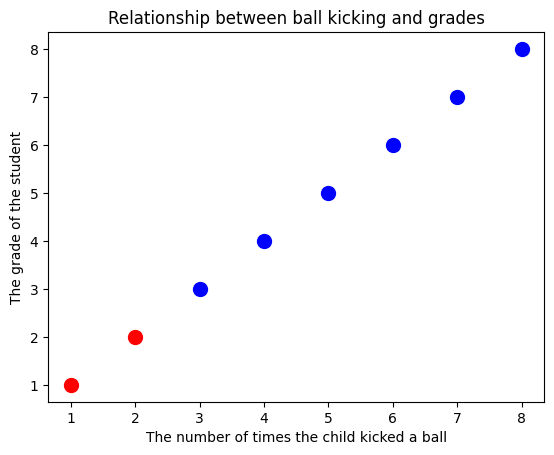

In [12]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades');

And let's add a legend as well. You'll see that matplotlib places this in the upper left hand corner and puts a little visual about our data series there.

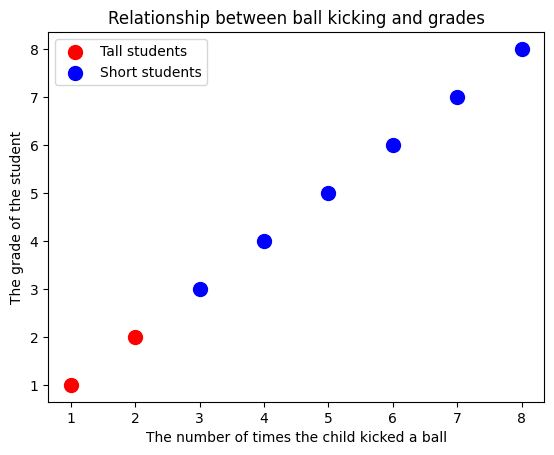

In [13]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades');
# add a legend (uses the labels from plt.scatter)
plt.legend();

In the docs for the legend, you'll see that there are a number of different parameters and one of them is called lock. And a value of 4, we'll put it in the lower right hand corner of the axis.

We could also get rid of the frame and add a title, and do any number of different transformations.

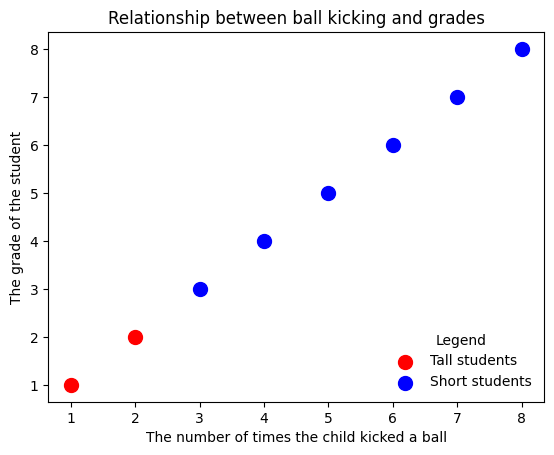

In [14]:
f=plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students');

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades');
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend');

Now, all of the things I've been showing you are renderable objects associated with the axes. The legend, for instance, is an artist, which means it can contain children. Let's take advantage of this and write a little routine to recursively go through the list of children in an artist.

In [15]:
# First, we'll import the artist class from matplotlib.
from matplotlib.artist import Artist

# Then we'll make a recursive function which takes in an artist and some depth parameter.
def rec_gc(art, depth=0):
    # Then checks if the object is an artist and if so, prints out its string name.
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(f.legend())

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBboxPatch((0, 0), width=1, height=1)


So you can see the legend artist is just made up of a number of different offsetboxes for drawing, as well as TextAreas and PathCollections.

What I want you to take away from this is that there is nothing magical about what matplotlib is doing. Calls to the scripting interface, just create figures, subplots, and axis. Then load those axis up with various artists, which the back-end renders to the screen or some other medium like a file.

While you'll spend 95% of your time at the scripting layer, happily creating graphs and charts, it's important to understand how the library works underneath for the other 5% of the time.

And the time that you will use this is when you really want to have control over and to create your own charting functions, and you'll have a chance to do that by the end of this course.

In the next lecture, we'll go back into line plots and create a few more then onto bar charts.

# Line Plots

We've already seen line plots a couple times, but they looked a lot like scatter plots.

A line plot is created with the `plot` function and renders a number of different series of data points and connects each point in a series with a line. Let's jump right in. 
So there are a couple of things which are new about this versus the scatter plots. 

- First, we only gave y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value. Which is pretty handy when you want to make quick plots.
- Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.

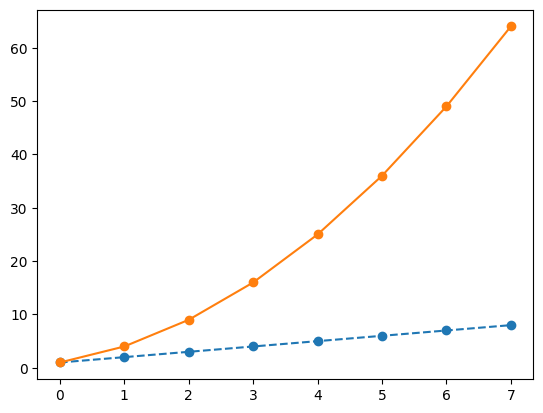

In [56]:
import matplotlib.pyplot as plt
# We can use numpy to use a linear series of data points one through eight. We'll 
# also create a number of quadratically increasing values as the second series. 
# Remember that you can use broadcasting in numpy to do this efficiently.
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

# This time I'll use the mini formatting language to describe how I want the markers
# and lines to be rendered. The -o means to use a solid line with circle markers.
# Note that I'm passing the data followed by the formatting for each series, so
# we'll see the result as a two data series, the linear one at the bottom and the quadratic 
# one at the top.
plt.figure()
plt.plot(linear_data, '--o', exponential_data, '-o');

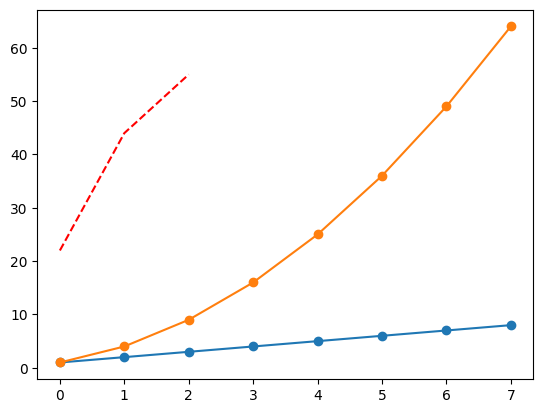

In [51]:
# It's pretty easy to extend this and add some arbitrary new line, this time I'll
# use --r which says to plot a dashed line in red.
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r');

Wait, did you notice what I did there? I didn't call `plt.figure()`! By default pyplot's scripting interface will call plt.gcf() when you try and do something. If no figure is defined, it will create a new one for you. The way JupyterLab is configured by default it will automatically close a figure after each cell is executed, so this means pyplot is going to create a new figure for us for each and every cell. This is a great time saver -- good by `plt.figure()`! 

We can use the regular axes functions creating labels for the axes and for the figure as a whole. And we can create a legend too. But since we didn't label the data points as we did with the scatter plot, we need to create legend entries when we add the legend itself.

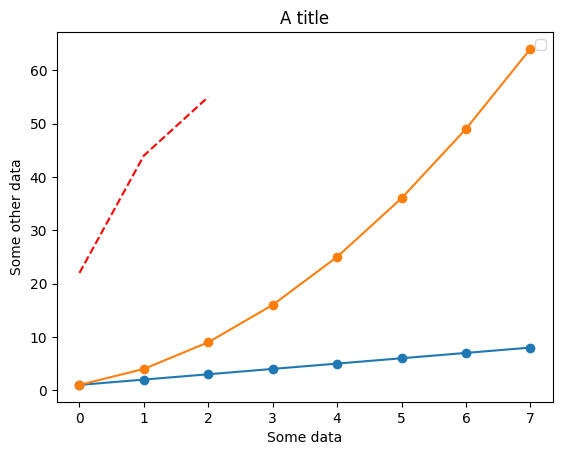

In [57]:
# Create some meaningful labels
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# Add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r');

This is a good time to introduce the *fill between* function of matplotlib. Now this function isn't specific to line plots, but you can see it commonly used with these plots, so I'll introduce it in this context. Let's imagine that we want to highlight the difference between the green and the blue curves. We could tell the Axes to paint a color between these series using the fill between function.

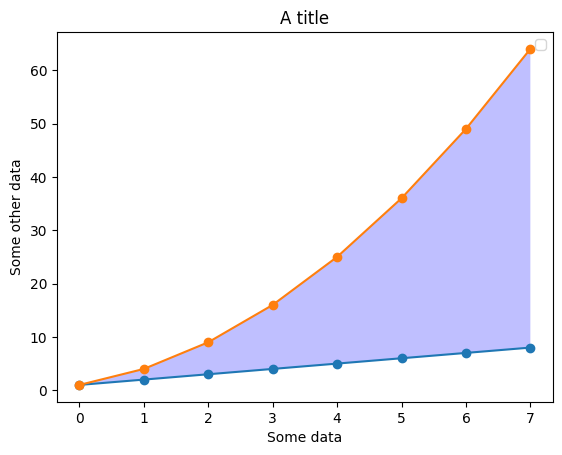

In [77]:
# Let's add our labels and legend just as before
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')

# Now we need to get the current axes object, and call fill_between. We didn't specify any x 
# values in our call to plot, so we'll just use the same range of data points it's already using. 
# Then we'll put in our lower bounds and our upper bounds along with the color we want painted 
# and for fun I'll include a transparency value. And that's all there is to it.
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data,
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!
More likely you'll have a series of x values and y values which you're looking to plot. Often with line plots this comes in the form of date time on the x axes. Let's change our x axis to a series of eight date time instances in one day intervals.

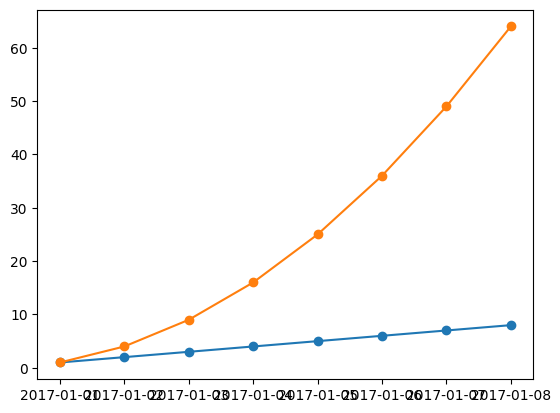

In [89]:
# I'll use the NumPy arrange function which you saw previously is really helpful to generate
# some sample dates for us. We can ask for an arrangement of dates at daily intervals just 
# by providing the start and end dates.
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

# We can now replot our linear and exponential data against this set of dates.
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

This produces a pretty decent looking figure with the data we want. But the dates overlap pretty heavily. Now, there's a couple of things that we could do here. For instance, everything is from 2017. So we could iterate through and change the labels by stripping the year, and then add an x axis label which clarifies that it's all for the year of 2017. This is pretty reasonable, but I wanted to show you a couple of features of how matplotlib uses text instead.

There are lots of interesting properties of the axes object and you should use some them in the assignment. For instance; you can get the grid lines, the tick locations for both major and minor ticks and so on. Just like all artists, an axes has a bunch of children which are themselves artists. In fact, if you're are following along in the JupyterLab notebook with this lecture why don't you just pause the video and run the `rec_gc` function we wrote earlier to explore what kind of artists the x axes object actually contains.

What I want to show you though, is that you can access the text of the tics using the get tick labels function. Each of the tick labels are a text object which itself is an artist. This means that you can use a number of different artist functions and one specific to text is the set rotation function which changes the rotation based on degrees. Let's iterate through the axis labels and change that.

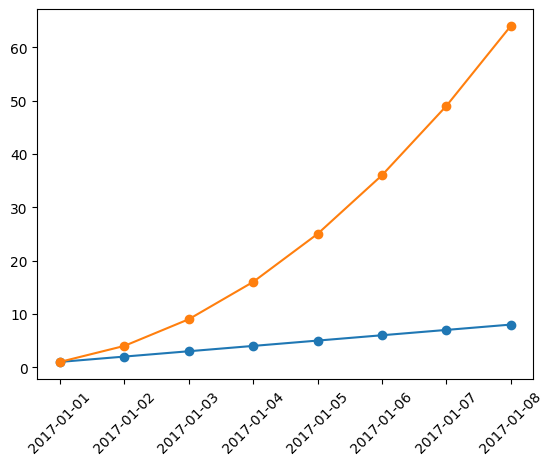

In [85]:
# Our plot data
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

# Now lets get a variable which points at the x axis
x = plt.gca().xaxis

# Now we can iterate through each one and rotate the tick labels
for item in x.get_ticklabels():
    item.set_rotation(45)

Let's add back in our headings

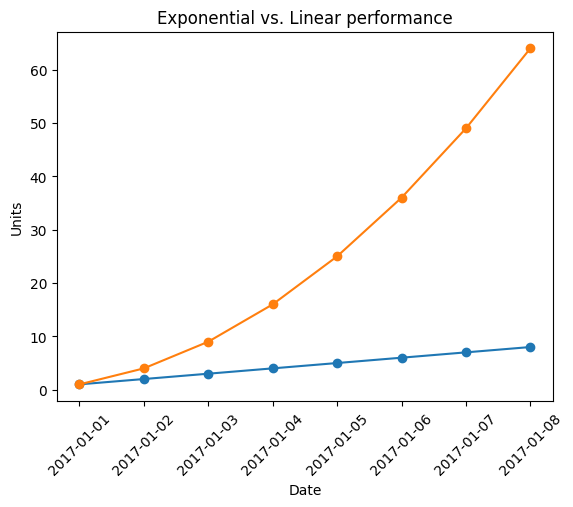

In [86]:
# Merging code from previous
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    

# Change our labels
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance');

And there we go, wonderfully readable dates in matplotlib. And when we're talking of text and readbility let me share two other insights, the first dealing with equations. Matplotlib has a fairly strong connection to LaTeX a type setting language used by mathematicians and scientists. This means that you can use a subset of LaTeX directly in your labels then matplotlib will render them as equations Here, for instance, we can set the title of the axes so that there's an x squared directly in it. We do this by escaping to LaTeX math mode with dollar signs. Note that this works regardless of whether you have LaTeX installed. But with a full LaTeX installation, you have significant control over text formatting.

For the second insight, I want to talk about the size of the figure itself. Why are we looking at small postage stamp figures? Well, that depends on your screen size and resolution, but we can tell matplotlib that we want the figure to be a certain size by passing in parameters when we first make the figure. Here I'll specify it in inches, but there are various other dimension methods you can use.

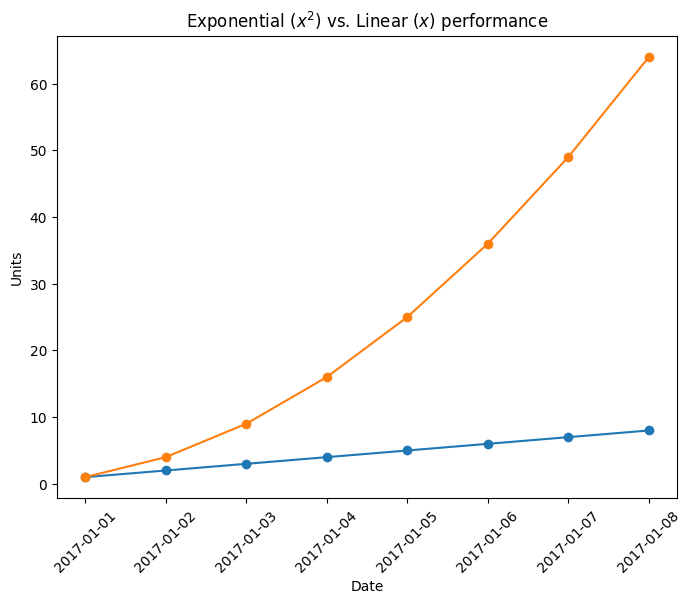

In [90]:
# By creating a new figure with the figsize parameter I'm telling matplotlib
# that I want an 8x6 inch figure at 300 DPI
plt.figure(figsize=(8,6))

# Now we can bring in our plotting details from before
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')

# And finally, I'll add in some mathematical expressions which you can do 
# in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance");

That's been a pretty successful look at matplotlib basics I think -- from the architecture overview to creating clean charts we could include in a report or just in our own data explorations. I want to show you one more this week in the next lecture, the bar chart.

# Bar Charts

Matplotlib has support for several kinds of bar charts. In the most general case we plot a bar chart by sending in a parameter of the x components, and a parameter of the height of the bar. Let's do this with some linear data. 

<BarContainer object of 8 artists>

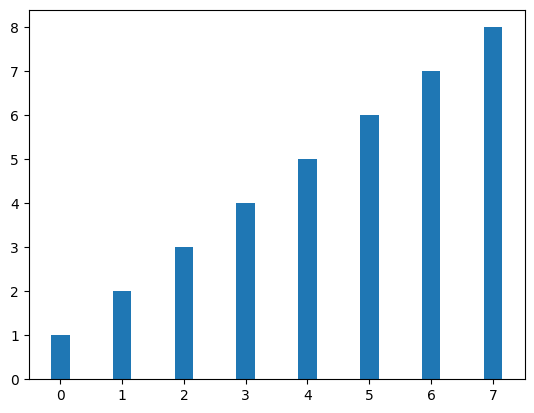

In [102]:
# Bring in our libraries and create the linear data
import matplotlib.pyplot as plt
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])

# Then, I'll generate a list of X labels
xvals = range(len(linear_data))
# And send this along with the linear data's bar heights, to the bar function. 
# We pass in the width of the bar as 0.3.
plt.bar(xvals, linear_data, width = 0.3)

To add a second bar, we simply call the bar plot again with new data, keeping in mind that we need to adjust the x component to make up for the first bar we plotted.

<BarContainer object of 8 artists>

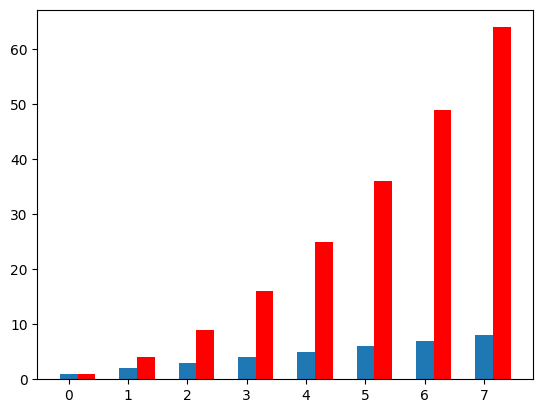

In [101]:
# Lets compare some exponential data here
new_xvals = []
exponential_data = linear_data**2

# Now we want to adjust the x axis values to make up
# for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

# And we just plot both items
plt.bar(xvals, linear_data, width = 0.3)
plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

So the plot looks okay, but not great. All of the x labels are to the far left of the items being described, and not centered. Now, we can center them with a given bar, using the align parameter, but it's a bit frustrating when you have to make multiple bars, and you have to calculate it yourself. And it's a pain to go through and add a new data series manually. And this gets worse, we actually have to manually iterate through and add in dates if we want them. Because otherwise we couldn't set the bar left location appropriately.


I'll be honest, bar charts are one of my least favorite things to create in matplotlib. I feel like the foundation is there, but some of the ways I would want to use the API, such as plotting several series of data in groups across time, are sadly missing.

There are some other nice features of bar charts, though. For instance, you can add error bars to each bar as well, using the y-error parameter. For example, each of our pieces of data in the linear data might actually be a mean value, computed from many different observations. So we could just create a list of error values we want to render as well and show them.

<BarContainer object of 8 artists>

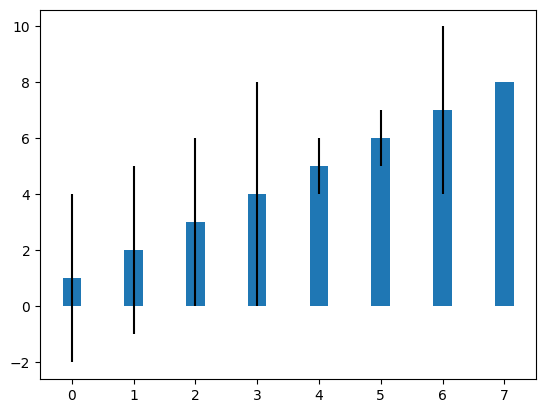

In [118]:
# I'll import from a random function which can generate some random integers, and then I'll use a 
# list comprehension to generate this new list.
from random import randint
linear_err = [randint(0,4) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

We can also do stacked bar charts as well. For instance, if we wanted to show cumulative values while also keeping the series independent, we could do this by setting the bottom parameter and our second plot to be equal to first set of data to plot.

<BarContainer object of 8 artists>

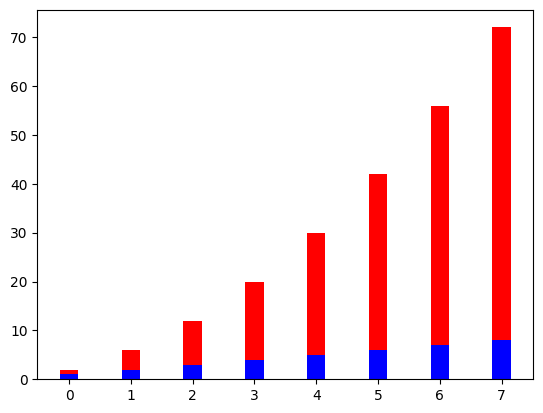

In [120]:
# All wee need to do here is to set the bottom parameter of the second barchart
# to be the linear data heights
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

Finally, we can pivot this bar graph into a horizontal bar graph by calling the barh function instead.

But note that we have to change the bottom to a left and the width to a height.

<BarContainer object of 8 artists>

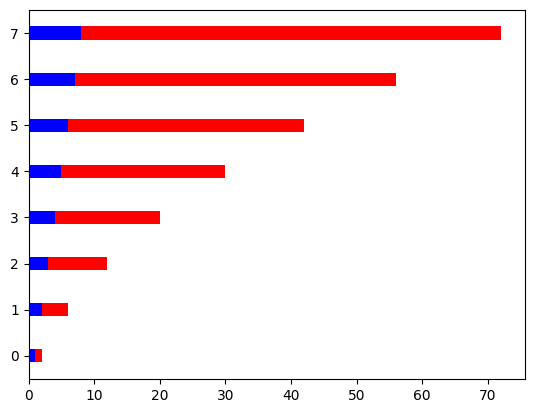

In [124]:
# To switch to horizontal bar charts we just use barh as the function, and then
# changer the width parameter to a height
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

So those are the basics of charting and plotting in Matplotlib. I think it's important to realize that there really isn't any magic -- the scripting layer is really a set of convenience functions on top of the object layer.

Some people have a preference for one or the other, but at the core, they manipulate the same data elements. And I don't think you should think of them as being opposed to one another or duplicative. They work together, and being able to move back and forth is really important.

We've talked about some fundamental charts in this module. Scatter plots, line graphs, and bar charts. There are more, which we'll dig into in the next module. But these are a good base for consideration.

The assignment for this module is a tough one. It's meant to show you real world data visualization problems. You're going to have to lever your knowledge of the Pandas Library from the first course and couple this with your new knowledge of Matplotlib to come to an elegant solution.

But the final result should be a portfolio ready piece. So I'll see you in the forums for discussions and for help.

# Dejunkifying a Plot

In this lecture, I want to walk you through the process of taking a regular Matplotlib plot and applying Tufte's principles of data-ink ratio and chartjunk to make it just a little bit better. I'm going to walk through all of the steps using the Jupyter notebooks and you're welcome to follow along.

But if you want a bit more of a challenge, I'll be including in video quizzes along the way which prompts you to solve the problem before I address.

Let's get started -- We will use a plot of data on the popularity of programming languages from Stack Overflow for the year 2016.

See the data here: [http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation](http://stackoverflow.com/research/developer-survey-2016#most-popular-technologies-per-occupation)

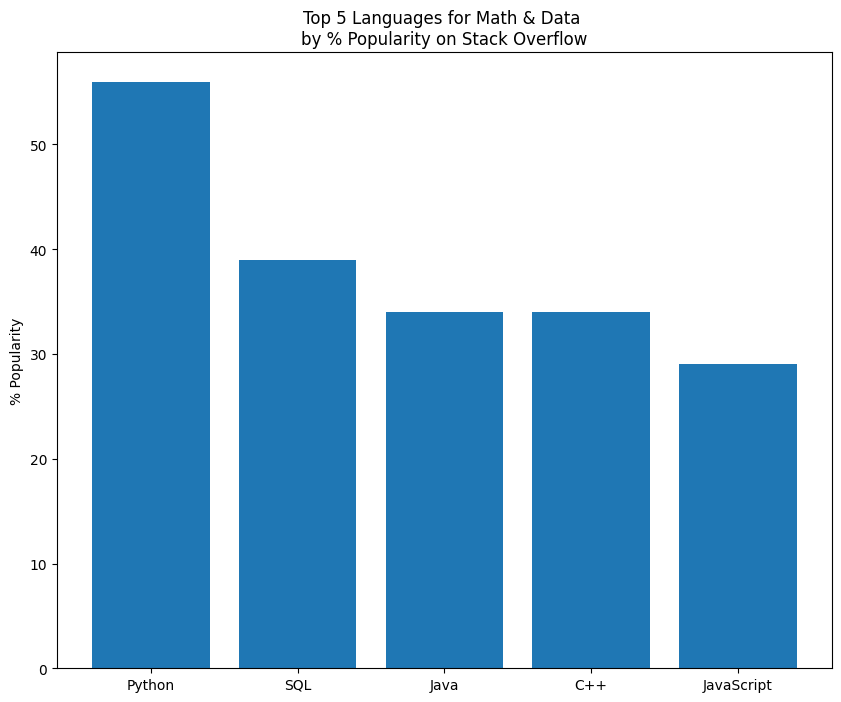

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# Here there are five different languages,
# Python, SQL, Java, C++, and JavaScript.
# We'll find their positions as a rank
# using NumPy as a range function.
# And here are the popularity
# values from Stack Overflow.
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# We'll create a bar chart based on rank and
# popularity, then add x and y ticks and
# set a title.
plt.figure(figsize=(10, 8));
plt.bar(pos, popularity, align='center');
plt.xticks(pos, languages);
plt.ylabel('% Popularity');
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow');

Okay, here's the first challenge -- our plot has this frame around it, but it's not really necessary and it seems a little heavyweight.

Let's remove that ink. This is a bit more involved, but we can get the current axis, then iterate through all the spine, setting their visibility to false.

Already that will make the chart look much more lightweight.

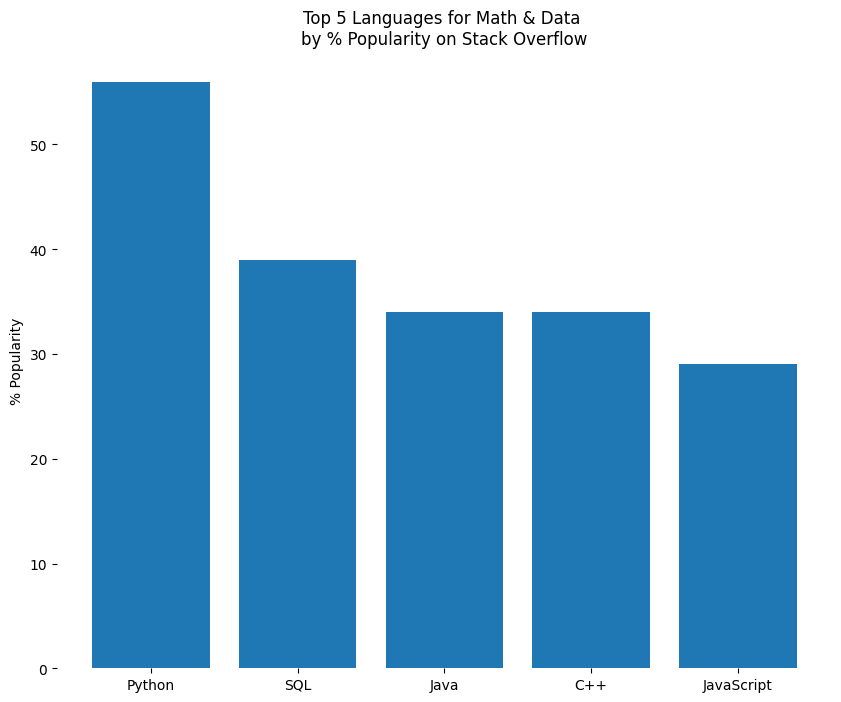

In [126]:
import matplotlib.pyplot as plt
import numpy as np

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.figure(figsize=(10, 8));
plt.bar(pos, popularity, align='center');
plt.xticks(pos, languages);
plt.ylabel('% Popularity');
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow');

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Now, the blue is okay, but it doesn't really help us differentiate between the bars at all. How about we soften all of the hard blacks to gray, then we change the bar colors to gray as well?

Also, let's keep the Python bar the same color of blue that it was originally to make it stand out.

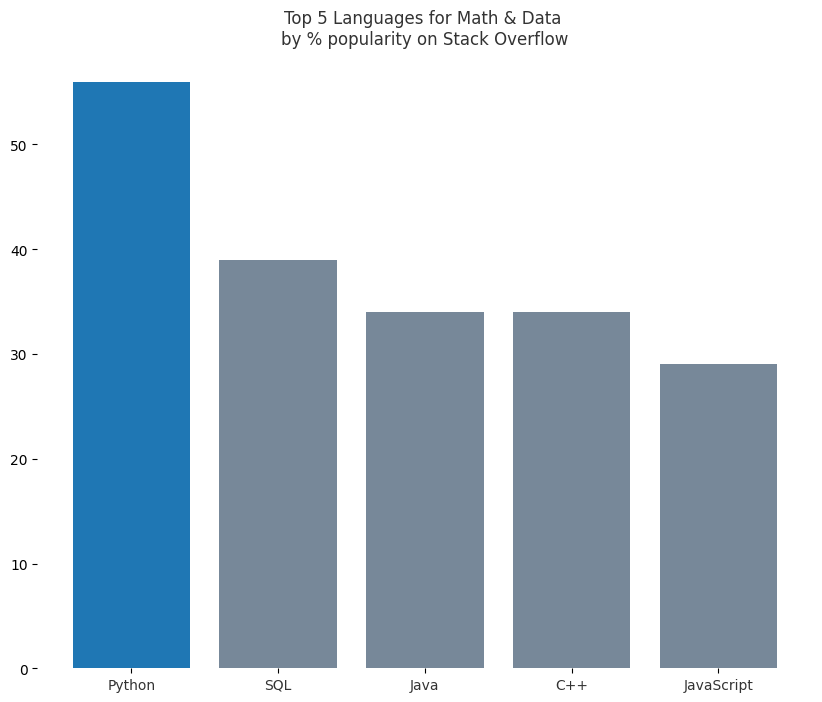

In [129]:
plt.figure(figsize=(10, 8));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# There are several different ways that we could do this.
# The way I chose was to add an alpha parameter to everything,
# which adds a bit of transparency and softens the colors up a bit.
# I also set the bars themselves to a neutral gray color then chose
# a nice blue from the Python website to accentuate the first bar.

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# change one bar, the python bar, to a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# set the title
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

Now let's fix the y axis by removing the labels and just directly labeling the individual bars.

We don't really need the y axis label, since the title tells us everything we need to know about the units in this chart.

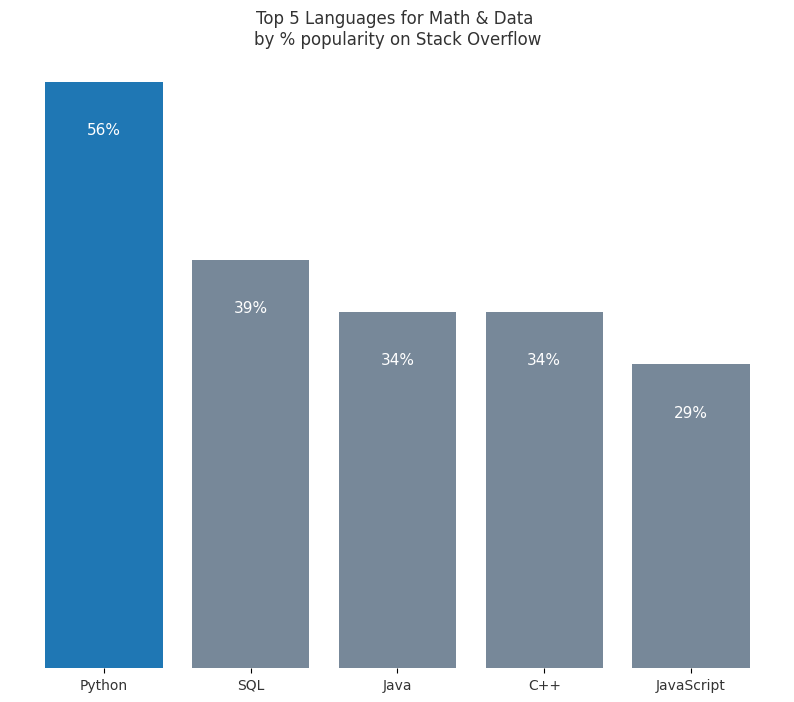

In [134]:
plt.figure(figsize=(10, 8));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
bars[0].set_color('#1F77B4')

plt.xticks(pos, languages, alpha=0.8)

# We can remove the y label by just setting it to an empty list
plt.yticks([])

plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Removing the label is easy, but changing
# the bars is a little bit of a pain.
# For this we want to iterate over each
# of the bars and grab its height.
# Then we want to create a new text
# object with the data information.
for bar in bars:
    # Unfortunately, this means doing
    # a little bit of playing with padding.
    # Here I'll set up the x location to the bar
    # x plus the width divided by two and
    # the y location to be
    # the bar height minus five.

    # It might seem weird to get the middle
    # of the bar in the x dimension, but
    # that's because I'm setting the label
    # to center itself, horizontally.

    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(height)) + '%',
                   ha='center', color='w', fontsize=11)

And that's all there is to it. A simple series of steps to make your bar charts a little bit more usable.

When you were watching this video, did you find a different way to do things? Perhaps other elements from Tufte or Cairo that you think could be used to make this more readable?

Feel free to go into the discussion forums and share them with me and your classmates.